# Super Vector Machines

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

In [54]:
from sklearn.datasets import make_blobs

In [56]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

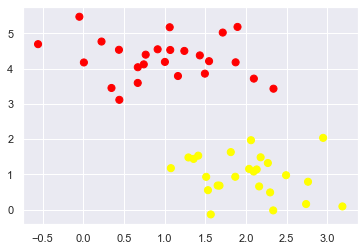

In [57]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

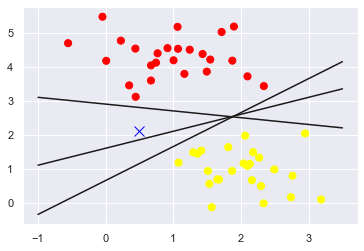

In [58]:
xx = np.linspace(-1,3.5)## Hace 100 particiones proporcionales del rango
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
plt.plot([0.5],[2.1],'x', color="blue", markersize=10)
for a, b in [(1,0.65), (0.5,1.6), (-0.2,2.9)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")

In [59]:
xx

array([-1.        , -0.90816327, -0.81632653, -0.7244898 , -0.63265306,
       -0.54081633, -0.44897959, -0.35714286, -0.26530612, -0.17346939,
       -0.08163265,  0.01020408,  0.10204082,  0.19387755,  0.28571429,
        0.37755102,  0.46938776,  0.56122449,  0.65306122,  0.74489796,
        0.83673469,  0.92857143,  1.02040816,  1.1122449 ,  1.20408163,
        1.29591837,  1.3877551 ,  1.47959184,  1.57142857,  1.66326531,
        1.75510204,  1.84693878,  1.93877551,  2.03061224,  2.12244898,
        2.21428571,  2.30612245,  2.39795918,  2.48979592,  2.58163265,
        2.67346939,  2.76530612,  2.85714286,  2.94897959,  3.04081633,
        3.13265306,  3.2244898 ,  3.31632653,  3.40816327,  3.5       ])

(-1.0, 3.5)

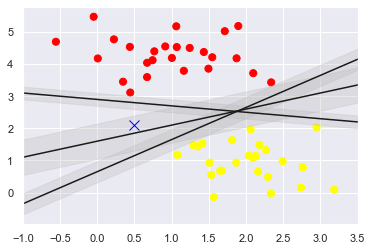

In [60]:
xx = np.linspace(-1,3.5)## Hace 100 particiones proporcionales del rango
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
plt.plot([0.5],[2.1],'x', color="blue", markersize=10)
for a, b, d in [(1,0.65,0.33), (0.5,1.6,0.55), (-0.2,2.9,0.2)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    plt.fill_between(xx, yy-d, yy+d, edgecolor='none', color="#BBBBBB", alpha=0.3)
plt.xlim(-1,3.5)

# Creación del modelo SVM

In [61]:
from sklearn.svm import SVC

In [62]:
model = SVC(kernel="linear", C=1E10)
model.fit(X,Y)

SVC(C=10000000000.0, kernel='linear')

In [63]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()#Se grea un nuevo dibujo si ax es NONE
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ## Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T #generamos tuple
    P = model.decision_function(xy).reshape(X.shape)
    
    ##Representamos las froteras y los márgenes del SVC    
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--", "-", "--"])
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=100, linewidth=1, facecolors="blue")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


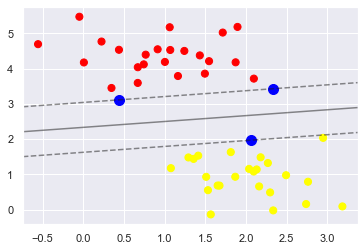

In [64]:
plt.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(model, plot_support=True)

In [65]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [71]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X=X[:N]
    Y=Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca() #Se asigna así misma o crea gráfico desde cero
    ax.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model,ax)   

[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


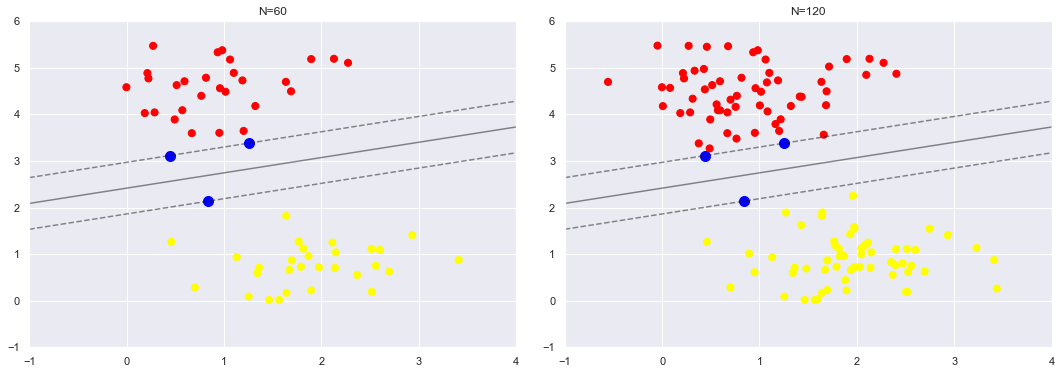

In [72]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right = 0.95, wspace = 0.1)
for ax_i, N, in zip(ax, [60, 120]):
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))

In [3]:
from ipywidgets import interact, fixed

In [4]:
interact(plot_svm, ax=fixed(None), N=range(10,1000))

NameError: name 'plot_svm' is not defined